In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import pickle

In [47]:
df_original = pd.read_csv('recipeData.csv', encoding='latin-1') 

In [48]:
df_original.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [49]:
description_cols = ['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'UserId']
redundant_cols = ['Size(L)', 'BrewMethod']
recipe_inputs_crazy = ['PrimingMethod', 'PrimingAmount']

final_values = ['FG','ABV', 'IBU', 'Color']
recipe_inputs_nums = ['BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp', 'OG']
recipe_inputs_cats = ['SugarScale']

In [50]:
df_all_options = df_original.drop(description_cols + redundant_cols + recipe_inputs_crazy, axis = 1)

In [51]:
df_all_options.describe()

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000
mean,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641
std,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676
min,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000
25%,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000
50%,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000
75%,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000
max,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000


In [52]:
df_all_options_2 = df_all_options[(df_all_options['Color'] < 60) & 
                                  (df_all_options['OG'] < 1.2) & 
                                  (df_all_options['BoilTime'] < 150) & 
                                  (df_all_options['MashThickness'] < 7) &
                                  (df_all_options['IBU'] < 200) & 
                                  (df_all_options['BoilSize'] < 100) &
                                  (df_all_options['FG'] < 1.05) & 
                                  (df_all_options['BoilGravity'] < 1.15) &
                                  (df_all_options['FG'] > 0.95) &
                                  (df_all_options['PrimaryTemp'] <= 40)
                                 ]

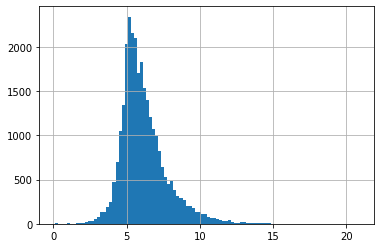

In [53]:
df_all_options_2['ABV'].hist(bins = 100)

In [54]:
df_all_options_2.describe()

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
count,28778.000000,28778.000000,28778.000000,28778.000000,28778.000000,28778.000000,28778.000000,28778.000000,28778.000000,28778.000000,18535.000000,28778.000000
mean,1.060710,1.013865,6.156855,44.633629,13.276633,31.346976,67.160400,1.047606,70.616712,2.049652,0.774610,18.932335
std,0.015353,0.004831,1.604943,29.065815,11.816596,13.077843,14.170661,0.012989,7.851370,0.899450,0.395291,3.463721
min,1.001000,0.997000,0.080000,0.000000,0.000000,1.890000,0.000000,1.000000,6.300000,0.000000,0.000000,-17.780000
25%,1.051000,1.011000,5.120000,25.150000,5.180000,25.360000,60.000000,1.039000,70.000000,1.500000,0.500000,18.000000
50%,1.058000,1.013000,5.840000,36.890000,8.370000,28.390000,60.000000,1.046000,70.000000,1.500000,0.750000,20.000000
75%,1.067000,1.016000,6.860000,57.700000,16.407500,31.230000,75.000000,1.053000,75.000000,3.000000,1.000000,20.000000
max,1.199000,1.048000,20.860000,199.820000,50.000000,99.500000,140.000000,1.149000,100.000000,6.880000,2.000000,40.000000


# My ideal scenario for project 3
- **Target = efficiency**
- Features: Pitch Rate, Primary Temp, Mash Thickness, Boil Time, Boil Size, OG

In [55]:
df_all_options_3 = df_all_options_2.dropna()

In [56]:
df_all_options_3.describe()

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
count,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000,18535.000000
mean,1.061287,1.014067,6.208187,44.933104,13.378086,31.691223,67.762018,1.048006,70.910952,1.969675,0.774610,18.812916
std,0.015673,0.004918,1.639463,29.557482,11.883083,13.102130,14.579020,0.013141,7.562429,0.876454,0.395291,3.572344
min,1.001000,0.998000,0.080000,0.000000,0.000000,3.030000,0.000000,1.000000,6.300000,0.000000,0.000000,-17.780000
25%,1.051000,1.011000,5.130000,25.125000,5.170000,25.740000,60.000000,1.040000,70.000000,1.400000,0.500000,18.000000
50%,1.058000,1.013000,5.860000,36.840000,8.440000,28.390000,60.000000,1.046000,70.000000,1.500000,0.750000,19.440000
75%,1.068000,1.016000,6.930000,58.375000,16.770000,32.000000,75.000000,1.054000,75.000000,2.700000,1.000000,20.000000
max,1.199000,1.048000,20.610000,199.820000,50.000000,99.500000,140.000000,1.149000,100.000000,6.880000,2.000000,40.000000


In [67]:
df_all_options_4 = df_all_options_3[(df_all_options_3['Efficiency'] < 40) | 
                                  (df_all_options_3['Efficiency'] > 80)]

In [68]:
df_all_options_4.describe()

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,1.057991,1.013033,5.912439,40.428071,12.159163,35.045041,68.265696,1.047887,75.075250,2.050932,0.808826,18.823840
std,0.017369,0.005352,1.836195,27.655839,11.061989,16.353126,16.571873,0.016907,20.840657,0.900258,0.414474,3.688325
min,1.010000,0.998000,0.950000,0.000000,0.490000,3.790000,0.000000,1.000000,6.300000,0.250000,0.350000,-8.330000
25%,1.048000,1.010000,4.935000,23.060000,4.730000,26.500000,60.000000,1.038000,81.000000,1.500000,0.500000,18.000000
50%,1.056000,1.012000,5.690000,34.100000,7.840000,28.500000,60.000000,1.046000,84.000000,1.500000,0.750000,19.440000
75%,1.066000,1.016000,6.765000,51.710000,14.850000,47.000000,90.000000,1.055000,85.000000,3.000000,1.000000,20.000000
max,1.165000,1.043000,16.270000,190.480000,50.000000,99.500000,120.000000,1.149000,100.000000,6.430000,2.000000,40.000000


In [69]:
df_bimodal_few_features = df_all_options_4.drop(final_values, axis = 1)

In [70]:
df_bimodal_few_features.head()

,OG,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp
21,1.084,51.10,60,1.075,90.0,1.25,Specific Gravity,1.00,20.56
141,1.049,41.64,60,1.044,85.0,1.25,Specific Gravity,0.75,18.33
249,1.069,28.39,90,1.055,85.0,1.75,Specific Gravity,0.75,19.44
312,1.076,7.10,75,1.044,85.0,2.75,Specific Gravity,1.00,19.00
327,1.069,87.06,60,1.063,82.0,1.50,Specific Gravity,0.75,20.56


In [71]:
df_bimodal_few_features.describe()

,OG,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,1.057991,35.045041,68.265696,1.047887,75.075250,2.050932,0.808826,18.823840
std,0.017369,16.353126,16.571873,0.016907,20.840657,0.900258,0.414474,3.688325
min,1.010000,3.790000,0.000000,1.000000,6.300000,0.250000,0.350000,-8.330000
25%,1.048000,26.500000,60.000000,1.038000,81.000000,1.500000,0.500000,18.000000
50%,1.056000,28.500000,60.000000,1.046000,84.000000,1.500000,0.750000,19.440000
75%,1.066000,47.000000,90.000000,1.055000,85.000000,3.000000,1.000000,20.000000
max,1.165000,99.500000,120.000000,1.149000,100.000000,6.430000,2.000000,40.000000


In [72]:
df_bimodal_few_features.columns

Index(['OG', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'MashThickness', 'SugarScale', 'PitchRate', 'PrimaryTemp'],
      dtype='object')

In [73]:
df_bimodal_few_features = df_bimodal_few_features.drop(['SugarScale'], axis = 1)

In [74]:
df_bimodal_few_features['OK'] = df_bimodal_few_features['Efficiency'].apply(lambda x: 0 if x <= 40 else 1)

In [75]:
with open('eda_1.pickle', 'wb') as to_write:
    pickle.dump(df_bimodal_few_features, to_write)